In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
file_to_load = ("employment_data_us.csv")

# Read Purchasing File and store into Pandas data frame
main = pd.read_csv(file_to_load)


main2017 = main.loc[main['AREA_NAME'].isin(['Sacramento--Roseville--Arden-Arcade, CA',
                                        'San Jose-Sunnyvale-Santa Clara, CA',
                                        'Seattle-Bellevue-Everett, WA Metropolitan Division',
                                        'Portland-Vancouver-Hillsboro, OR-WA',
                                        'Austin-Round Rock-San Marcos, TX',
                                        'San Antonio-New Braunfels, TX',
                                       ])]


main2017p = main2017.loc[main2017['OCC_GROUP'].isin(['detailed'])]


main2017_r = main2017p.loc[main['OCC_CODE'].isin(['15-3021','11-9121','15-1111','15-1121','15-1122',
'15-1131','15-1132','15-1133','15-1134','15-1141','25-1064','25-1065','25-1066','25-1067','25-1069',
'15-1142','15-1143','15-1151','15-1152','15-1199','15-2011','15-2021','15-2031','15-2041','15-2091',
'15-2099','17-1021','17-1022','17-2011','17-2021','17-2031','17-2041','17-2051','17-2061','17-2071',
'17-2072','17-2081','17-2111','17-2112','17-2121','17-2131','17-2141','17-2151','17-2161','17-2171',
'17-2199','17-3012','17-3013','17-3019','17-3021','17-3022','17-3023','17-3024','17-3025','17-3026',
'17-3027','17-3029','17-3031','19-1011','19-1012','19-1013','19-1021','19-1022','19-1023','19-1029',
'19-1031','19-1032','19-1041','19-1042','19-1099','19-2011','19-2012','19-2021','19-2031','19-2032',
'19-2041','19-2042','19-2043','19-2099','19-4011','19-4021','19-4031','19-4041','19-4051','19-4091',
'19-4092','19-4093','25-1021','25-1022','25-1032','25-1041','25-1042','25-1043','25-1051','25-1052',
'25-1053','25-1054','41-4011','41-9031','11-9041','17-3011','19-4099','11-9111','25-1071','25-1072',
'29-1011','29-1021','29-1022','29-1023','29-1024','29-1029','29-1031','29-1041','29-1051','29-1061',
'29-1062','29-1063','29-1064','29-1065','29-1066','29-1067','29-1069','29-1071','29-1081','29-1122',
'29-1123','29-1124','29-1125','29-1126','29-1127','29-1128','29-1129','29-1131','29-1141','29-1151',
'29-1161','29-1171','29-1181','29-1199','29-2011','29-2012','29-2021','29-2031','29-2032','29-2033',
'29-2034','29-2035 ','29-2041','29-2051','29-2052','29-2053','29-2054','29-2055','29-2056','29-2057',
'29-2061','29-2071','29-2081','29-2091','29-2092','29-2099','29-9011','29-9012','29-9091','29-9092',
'29-9099','17-1011','17-1012','25-1031','19-3011','19-3022','19-3031','19-3032','19-3039','19-3041',
'19-3051','19-3091','19-3092','19-3094','19-3099','19-4061','25-1061','25-1062','25-1063','25-1064',    
])]


empl = main2017_r[['AREA_NAME','YEAR','TOT_EMP','JOBS_1000','A_MEAN','A_MEDIAN']]

jobs = empl[['AREA_NAME','YEAR','TOT_EMP','JOBS_1000']]
inc = empl[['AREA_NAME','YEAR','A_MEAN','A_MEDIAN']]

inc_nt = inc.dropna(how='any')
jobs_nt = jobs.dropna(how='any')

#------ Tech Info 

jobs_nt['TOT_EMP'] = jobs_nt.TOT_EMP.astype(float)
jobs_nt['JOBS_1000'] = jobs_nt.JOBS_1000.astype(float)
jobs_nt['YEAR'] = jobs_nt.YEAR.astype(float)
inc_nt['A_MEAN'] = inc_nt.A_MEAN.astype(float)
inc_nt['A_MEDIAN'] = inc_nt.A_MEDIAN.astype(float)


#new_jobs = jobs_nt.groupby(["YEAR","AREA_NAME"]).sum()
#new_inc = inc_nt.groupby(["YEAR","AREA_NAME"]).mean()

#------ Total Info

empl_t = main2017p[['AREA_NAME','YEAR','TOT_EMP','JOBS_1000','A_MEAN','A_MEDIAN']]
jobs_t = empl_t[['AREA_NAME','YEAR','TOT_EMP','JOBS_1000']]
inc_t = empl_t[['AREA_NAME','YEAR','A_MEAN','A_MEDIAN']]

inc_n = inc_t.dropna(how='any')
jobs_n = jobs_t.dropna(how='any')

jobs_n['TOT_EMP'] = jobs_n.TOT_EMP.astype(float)
jobs_n['JOBS_1000'] = jobs_n.JOBS_1000.astype(float)
inc_n['A_MEAN'] = inc_n.A_MEAN.astype(float)
inc_n['A_MEDIAN'] = inc_n.A_MEDIAN.astype(float)
#new_jobs_t = jobs_n.groupby(["YEAR","AREA_NAME"]).sum()
#new_inc_t = inc_n.groupby(["YEAR","AREA_NAME"]).mean()



In [3]:
# create pivots to consolidate information

tech_info = pd.pivot_table(inc_nt,index=["AREA_NAME","YEAR"])
total_info = pd.pivot_table(inc_n,index=["AREA_NAME","YEAR"])

In [4]:
tech_info_cleaned = tech_info.reset_index()

seattle = tech_info_cleaned.query('AREA_NAME == "Seattle-Bellevue-Everett, WA Metropolitan Division"')
portland = tech_info_cleaned.query('AREA_NAME == "Portland-Vancouver-Hillsboro, OR-WA"')
austin = tech_info_cleaned.query('AREA_NAME == "Austin-Round Rock-San Marcos, TX"')
san_antonio = tech_info_cleaned.query('AREA_NAME == "San Antonio-New Braunfels, TX"')
sacramento = tech_info_cleaned.query('AREA_NAME == "Sacramento--Roseville--Arden-Arcade, CA"')
san_jose = tech_info_cleaned.query('AREA_NAME == "San Jose-Sunnyvale-Santa Clara, CA"')
seattle

,AREA_NAME,YEAR,A_MEAN,A_MEDIAN
25,"Seattle-Bellevue-Everett, WA Metropolitan Divi...",2013,80758.866667,77340.400000
26,"Seattle-Bellevue-Everett, WA Metropolitan Divi...",2014,82515.673759,79264.255319
27,"Seattle-Bellevue-Everett, WA Metropolitan Divi...",2015,83092.464789,79674.436620
28,"Seattle-Bellevue-Everett, WA Metropolitan Divi...",2016,87272.653061,83114.693878
29,"Seattle-Bellevue-Everett, WA Metropolitan Divi...",2017,88076.275862,83198.827586


In [5]:
tech_info_cleaned_t = total_info.reset_index()

seattle_t = tech_info_cleaned_t.query('AREA_NAME == "Seattle-Bellevue-Everett, WA Metropolitan Division"')
portland_t = tech_info_cleaned_t.query('AREA_NAME == "Portland-Vancouver-Hillsboro, OR-WA"')
austin_t = tech_info_cleaned_t.query('AREA_NAME == "Austin-Round Rock-San Marcos, TX"')
san_antonio_t = tech_info_cleaned_t.query('AREA_NAME == "San Antonio-New Braunfels, TX"')
sacramento_t = tech_info_cleaned_t.query('AREA_NAME == "Sacramento--Roseville--Arden-Arcade, CA"')
san_jose_t = tech_info_cleaned_t.query('AREA_NAME == "San Jose-Sunnyvale-Santa Clara, CA"')
seattle_t

,AREA_NAME,YEAR,A_MEAN,A_MEDIAN
25,"Seattle-Bellevue-Everett, WA Metropolitan Divi...",2013,57913.323572,55334.011713
26,"Seattle-Bellevue-Everett, WA Metropolitan Divi...",2014,58655.877061,56040.239880
27,"Seattle-Bellevue-Everett, WA Metropolitan Divi...",2015,60033.712121,57294.439394
28,"Seattle-Bellevue-Everett, WA Metropolitan Divi...",2016,62652.083958,59577.451274
29,"Seattle-Bellevue-Everett, WA Metropolitan Divi...",2017,64195.258359,60722.933131


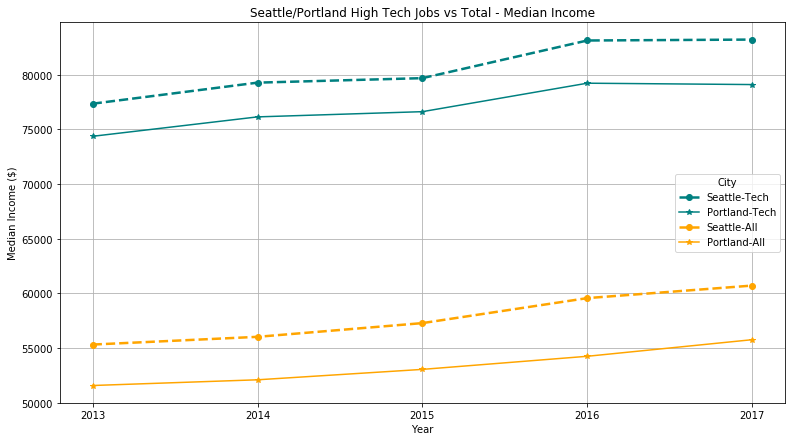

In [6]:
x_axis = [2013,2014,2015,2016,2017]

y_axis_s = seattle['A_MEDIAN']
y_axis_p = seattle_t['A_MEDIAN']
y_axis_po = portland['A_MEDIAN']
y_axis_ps = portland_t['A_MEDIAN']


plt.figure(1, figsize=(13,7))
plt.grid(True)

plt.xticks(x_axis)
plt.plot(x_axis, y_axis_s,'o--', color='teal', label='Seattle-Tech', linewidth=2.5)
plt.plot(x_axis, y_axis_po, '*-', color='teal', label='Portland-Tech')
plt.plot(x_axis, y_axis_p,'o--', color='orange', label='Seattle-All', linewidth=2.5)
plt.plot(x_axis, y_axis_ps, '*-', color='orange',label='Portland-All')

plt.legend(title="City", loc = "best")
plt.xlabel('Year')
plt.ylabel('Median Income ($)')
plt.title('Seattle/Portland High Tech Jobs vs Total - Median Income')
plt.show()

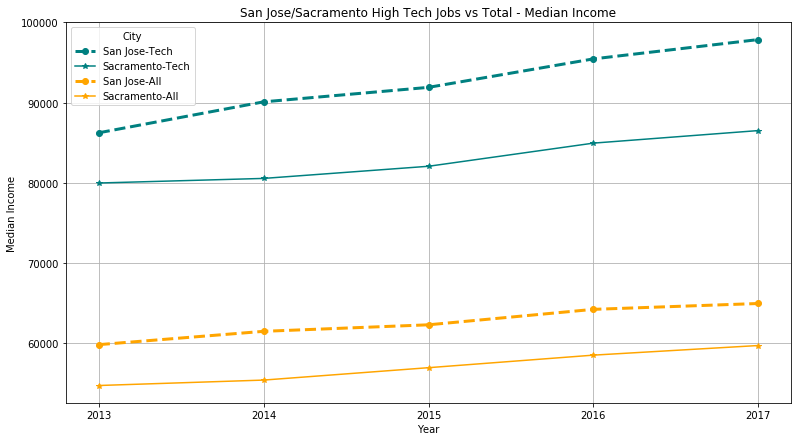

In [7]:
y_axis_sa = san_jose['A_MEDIAN']
y_axis_pa = san_jose_t['A_MEDIAN']
y_axis_poa = sacramento['A_MEDIAN']
y_axis_psa = sacramento_t['A_MEDIAN']

plt.figure(2, figsize=(13,7))
plt.grid(True)

plt.xticks(x_axis)
plt.plot(x_axis, y_axis_sa,'o--', color='teal', label='San Jose-Tech', linewidth=3)
plt.plot(x_axis, y_axis_poa, '*-', color='teal', label='Sacramento-Tech')
plt.plot(x_axis, y_axis_pa,'o--', color='orange', label='San Jose-All', linewidth=3)
plt.plot(x_axis, y_axis_psa, '*-', color='orange',label='Sacramento-All')

plt.legend(title="City", loc = "best")
plt.xlabel('Year')
plt.ylabel('Median Income')
plt.title('San Jose/Sacramento High Tech Jobs vs Total - Median Income')


plt.show()

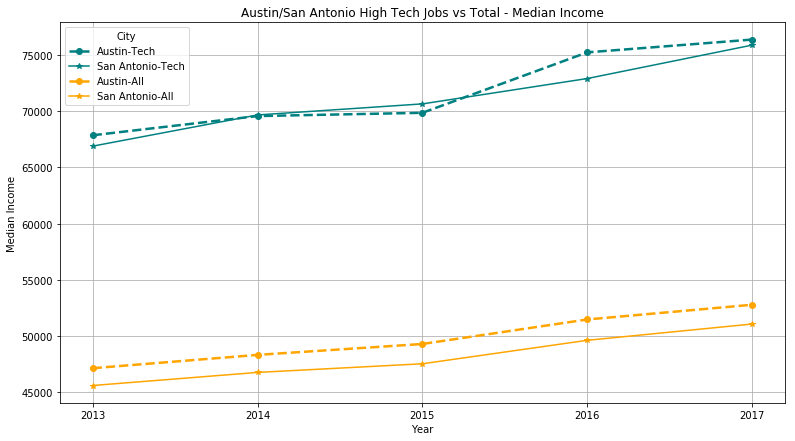

In [8]:
x_axis_r = [2013,2014,2015,2016,2017]

y_axis_sr = austin['A_MEDIAN']
y_axis_pr = austin_t['A_MEDIAN']
y_axis_por = san_antonio['A_MEDIAN']
y_axis_psr = san_antonio_t['A_MEDIAN']

plt.figure(3, figsize=(13,7))
plt.grid(True)

plt.xticks(x_axis)
plt.plot(x_axis, y_axis_sr,'o--', color='teal', label='Austin-Tech', linewidth=2.5)
plt.plot(x_axis, y_axis_por, '*-', color='teal', label='San Antonio-Tech')
plt.plot(x_axis, y_axis_pr,'o--', color='orange', label='Austin-All', linewidth=2.5)
plt.plot(x_axis, y_axis_psr, '*-', color='orange',label='San Antonio-All')


plt.legend(title="City", loc = "best")
plt.xlabel('Year')
plt.ylabel('Median Income')
plt.title('Austin/San Antonio High Tech Jobs vs Total - Median Income')


plt.show()

In [9]:
main2017_nt = main2017p.loc[~main['OCC_CODE'].isin(['15-3021','11-9121','15-1111','15-1121','15-1122',
'15-1131','15-1132','15-1133','15-1134','15-1141','25-1064','25-1065','25-1066','25-1067','25-1069',
'15-1142','15-1143','15-1151','15-1152','15-1199','15-2011','15-2021','15-2031','15-2041','15-2091',
'15-2099','17-1021','17-1022','17-2011','17-2021','17-2031','17-2041','17-2051','17-2061','17-2071',
'17-2072','17-2081','17-2111','17-2112','17-2121','17-2131','17-2141','17-2151','17-2161','17-2171',
'17-2199','17-3012','17-3013','17-3019','17-3021','17-3022','17-3023','17-3024','17-3025','17-3026',
'17-3027','17-3029','17-3031','19-1011','19-1012','19-1013','19-1021','19-1022','19-1023','19-1029',
'19-1031','19-1032','19-1041','19-1042','19-1099','19-2011','19-2012','19-2021','19-2031','19-2032',
'19-2041','19-2042','19-2043','19-2099','19-4011','19-4021','19-4031','19-4041','19-4051','19-4091',
'19-4092','19-4093','25-1021','25-1022','25-1032','25-1041','25-1042','25-1043','25-1051','25-1052',
'25-1053','25-1054','41-4011','41-9031','11-9041','17-3011','19-4099','11-9111','25-1071','25-1072',
'29-1011','29-1021','29-1022','29-1023','29-1024','29-1029','29-1031','29-1041','29-1051','29-1061',
'29-1062','29-1063','29-1064','29-1065','29-1066','29-1067','29-1069','29-1071','29-1081','29-1122',
'29-1123','29-1124','29-1125','29-1126','29-1127','29-1128','29-1129','29-1131','29-1141','29-1151',
'29-1161','29-1171','29-1181','29-1199','29-2011','29-2012','29-2021','29-2031','29-2032','29-2033',
'29-2034','29-2035 ','29-2041','29-2051','29-2052','29-2053','29-2054','29-2055','29-2056','29-2057',
'29-2061','29-2071','29-2081','29-2091','29-2092','29-2099','29-9011','29-9012','29-9091','29-9092',
'29-9099','17-1011','17-1012','25-1031','19-3011','19-3022','19-3031','19-3032','19-3039','19-3041',
'19-3051','19-3091','19-3092','19-3094','19-3099','19-4061','25-1061','25-1062','25-1063','25-1064',    
])]
main2017_nt

,Column1,YEAR,PRIM_STATE,AREA,AREA_NAME,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
14333,14333,2013,CA,40900,"Sacramento--Roseville--Arden-Arcade, CA",11-1011,Chief Executives,detailed,2740.0,2.3,...,55.14,77.51,#,"53,070","88,250",114700.0,"161,210",#,NaN,NaN
14334,14334,2013,CA,40900,"Sacramento--Roseville--Arden-Arcade, CA",11-1021,General and Operations Managers,detailed,13200.0,3.1,...,44.87,68.37,#,"48,360","67,960",93330.0,"142,220",#,NaN,NaN
14335,14335,2013,CA,40900,"Sacramento--Roseville--Arden-Arcade, CA",11-1031,Legislators,detailed,240.0,10.0,...,*,*,*,"38,130","47,660",92380.0,"92,390","92,390",True,NaN
14336,14336,2013,CA,40900,"Sacramento--Roseville--Arden-Arcade, CA",11-2011,Advertising and Promotions Managers,detailed,170.0,19.6,...,43.57,66.28,81.85,"54,420","63,900",90620.0,"137,860","170,250",NaN,NaN
14337,14337,2013,CA,40900,"Sacramento--Roseville--Arden-Arcade, CA",11-2021,Marketing Managers,detailed,1050.0,8.8,...,51.63,67.47,83.55,"54,660","78,030",107380.0,"140,340","173,790",NaN,NaN
14338,14338,2013,CA,40900,"Sacramento--Roseville--Arden-Arcade, CA",11-2022,Sales Managers,detailed,2650.0,5.3,...,49.21,75.35,#,"50,100","65,700",102360.0,"156,730",#,NaN,NaN
14339,14339,2013,CA,40900,"Sacramento--Roseville--Arden-Arcade, CA",11-2031,Public Relations and Fundraising Managers,detailed,400.0,12.7,...,48.11,68.77,#,"55,540","68,750",100070.0,"143,030",#,NaN,NaN
14340,14340,2013,CA,40900,"Sacramento--Roseville--Arden-Arcade, CA",11-3011,Administrative Services Managers,detailed,2120.0,6.0,...,42.96,57.41,72.54,"51,230","70,170",89370.0,"119,400","150,890",NaN,NaN
14341,14341,2013,CA,40900,"Sacramento--Roseville--Arden-Arcade, CA",11-3021,Computer and Information Systems Managers,detailed,2490.0,4.3,...,48.51,63.28,82.54,"82,160","91,410",100900.0,"131,630","171,690",NaN,NaN
14342,14342,2013,CA,40900,"Sacramento--Roseville--Arden-Arcade, CA",11-3031,Financial Managers,detailed,3540.0,5.3,...,46.27,62.80,86.96,"61,090","79,320",96250.0,"130,620","180,890",NaN,NaN


In [10]:

empl_nt = main2017_nt[['AREA_NAME','YEAR','TOT_EMP','JOBS_1000','A_MEAN','A_MEDIAN']]

jobs_ntt = empl_nt[['AREA_NAME','YEAR','TOT_EMP','JOBS_1000']]
inc_ntt = empl_nt[['AREA_NAME','YEAR','A_MEAN','A_MEDIAN']]

inc_ntt = inc_ntt.dropna(how='any')
jobs_ntt = jobs_ntt.dropna(how='any')

#------ Non Tech Info 

jobs_ntt['TOT_EMP'] = jobs_ntt.TOT_EMP.astype(float)
jobs_ntt['JOBS_1000'] = jobs_ntt.JOBS_1000.astype(float)
jobs_ntt['YEAR'] = jobs_ntt.YEAR.astype(float)
inc_ntt['A_MEAN'] = inc_ntt.A_MEAN.astype(float)
inc_ntt['A_MEDIAN'] = inc_ntt.A_MEDIAN.astype(float)



In [15]:
non_tech_info = pd.pivot_table(jobs_ntt,index=["AREA_NAME","YEAR"])
total_info_j = pd.pivot_table(jobs_nt,index=["AREA_NAME","YEAR"])

In [16]:
non_tech_info_cleaned = non_tech_info.reset_index()

seattle_nt = non_tech_info_cleaned.query('AREA_NAME == "Seattle-Bellevue-Everett, WA Metropolitan Division"')
portland_nt = non_tech_info_cleaned.query('AREA_NAME == "Portland-Vancouver-Hillsboro, OR-WA"')
austin_nt = non_tech_info_cleaned.query('AREA_NAME == "Austin-Round Rock-San Marcos, TX"')
san_antonio_nt = non_tech_info_cleaned.query('AREA_NAME == "San Antonio-New Braunfels, TX"')
sacramento_nt = non_tech_info_cleaned.query('AREA_NAME == "Sacramento--Roseville--Arden-Arcade, CA"')
san_jose_nt = non_tech_info_cleaned.query('AREA_NAME == "San Jose-Sunnyvale-Santa Clara, CA"')
seattle_nt

,AREA_NAME,YEAR,JOBS_1000,TOT_EMP
25,"Seattle-Bellevue-Everett, WA Metropolitan Divi...",2013.0,1.619668,2348.289206
26,"Seattle-Bellevue-Everett, WA Metropolitan Divi...",2014.0,1.580339,2358.884298
27,"Seattle-Bellevue-Everett, WA Metropolitan Divi...",2015.0,1.602038,2461.515152
28,"Seattle-Bellevue-Everett, WA Metropolitan Divi...",2016.0,1.611789,2560.546559
29,"Seattle-Bellevue-Everett, WA Metropolitan Divi...",2017.0,1.663071,2739.687500


In [17]:
tech_info_cleaned_j = total_info_j.reset_index()

seattle_ty = tech_info_cleaned_j.query('AREA_NAME == "Seattle-Bellevue-Everett, WA Metropolitan Division"')
portland_ty = tech_info_cleaned_j.query('AREA_NAME == "Portland-Vancouver-Hillsboro, OR-WA"')
austin_ty = tech_info_cleaned_j.query('AREA_NAME == "Austin-Round Rock-San Marcos, TX"')
san_antonio_ty = tech_info_cleaned_j.query('AREA_NAME == "San Antonio-New Braunfels, TX"')
sacramento_ty = tech_info_cleaned_j.query('AREA_NAME == "Sacramento--Roseville--Arden-Arcade, CA"')
san_jose_ty = tech_info_cleaned_j.query('AREA_NAME == "San Jose-Sunnyvale-Santa Clara, CA"')

seattle_ty

,AREA_NAME,YEAR,JOBS_1000,TOT_EMP
25,"Seattle-Bellevue-Everett, WA Metropolitan Divi...",2013.0,1.210896,1755.324675
26,"Seattle-Bellevue-Everett, WA Metropolitan Divi...",2014.0,1.201993,1794.520548
27,"Seattle-Bellevue-Everett, WA Metropolitan Divi...",2015.0,1.196088,1837.891156
28,"Seattle-Bellevue-Everett, WA Metropolitan Divi...",2016.0,1.164090,1849.724138
29,"Seattle-Bellevue-Everett, WA Metropolitan Divi...",2017.0,1.114967,1836.800000


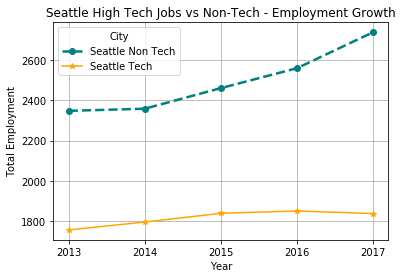

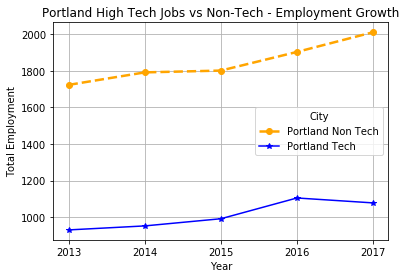

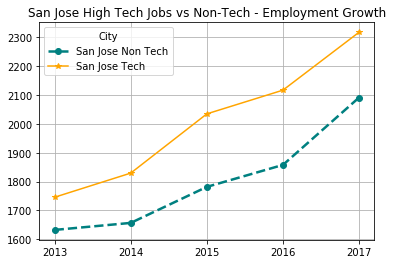

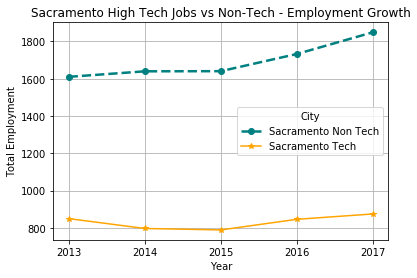

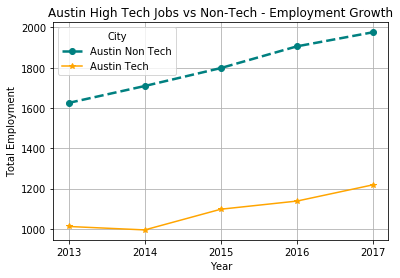

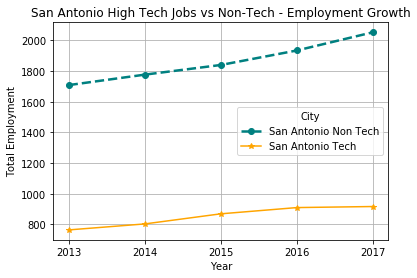

In [18]:
import numpy as np

x_axis = [2013,2014,2015,2016,2017]

y_axis_seatlle_nt = seattle_nt['TOT_EMP']
y_axis_seatlle_t = seattle_ty['TOT_EMP']
y_axis_portland_nt = portland_nt['TOT_EMP']
y_axis_portland_t = portland_ty['TOT_EMP']
y_axis_san_jose_nt = san_jose_nt['TOT_EMP']
y_axis_san_jose_t = san_jose_ty['TOT_EMP']
y_axis_sacramento_nt = sacramento_nt['TOT_EMP']
y_axis_sacramento_t = sacramento_ty['TOT_EMP']
y_axis_austin_nt = austin_nt['TOT_EMP']
y_axis_austin_t = austin_ty['TOT_EMP']
y_axis_san_antoio_nt = san_antonio_nt['TOT_EMP']
y_axis_san_antoio_t = san_antonio_ty['TOT_EMP']


plt.figure(4, figsize=(6,4))
plt.grid(True)

plt.xticks(x_axis)
plt.plot(x_axis, y_axis_seatlle_nt,'o--', color='teal', label='Seattle Non Tech', linewidth=2.5)
plt.plot(x_axis, y_axis_seatlle_t, '*-', color='orange', label='Seattle Tech')

plt.legend(title="City", loc = "best")
plt.xlabel('Year')
plt.ylabel('Total Employment')
plt.title('Seattle High Tech Jobs vs Non-Tech - Employment Growth')


plt.figure(5, figsize=(6,4))
plt.grid(True)
plt.xticks(x_axis)
plt.plot(x_axis, y_axis_portland_nt,'o--', color='orange', label='Portland Non Tech', linewidth=2.5)
plt.plot(x_axis, y_axis_portland_t, '*-', color='blue',label='Portland Tech')

plt.legend(title="City", loc = "best")
plt.xlabel('Year')
plt.ylabel('Total Employment')
plt.title('Portland High Tech Jobs vs Non-Tech - Employment Growth')

plt.show()

plt.figure(6, figsize=(6,4))
plt.grid(True)

plt.xticks(x_axis)
plt.plot(x_axis, y_axis_san_jose_nt,'o--', color='teal', label='San Jose Non Tech', linewidth=2.5)
plt.plot(x_axis, y_axis_san_jose_t, '*-', color='orange', label='San Jose Tech')

plt.legend(title="City", loc = "best")
#plt.xlabel('Year')
#plt.ylabel('Total Employment')
plt.title('San Jose High Tech Jobs vs Non-Tech - Employment Growth')


plt.show()

plt.figure(7, figsize=(6,4))
plt.grid(True)

plt.xticks(x_axis)
plt.plot(x_axis, y_axis_sacramento_nt,'o--', color='teal', label='Sacramento Non Tech', linewidth=2.5)
plt.plot(x_axis, y_axis_sacramento_t, '*-', color='orange', label='Sacramento Tech')

plt.legend(title="City", loc = "best")
plt.xlabel('Year')
plt.ylabel('Total Employment')
plt.title('Sacramento High Tech Jobs vs Non-Tech - Employment Growth')


plt.show()

plt.figure(8, figsize=(6,4))
plt.grid(True)

plt.xticks(x_axis)
plt.plot(x_axis, y_axis_austin_nt,'o--', color='teal', label='Austin Non Tech', linewidth=2.5)
plt.plot(x_axis, y_axis_austin_t, '*-', color='orange', label='Austin Tech')

plt.legend(title="City", loc = "best")
plt.xlabel('Year')
plt.ylabel('Total Employment')
plt.title('Austin High Tech Jobs vs Non-Tech - Employment Growth')


plt.show()

plt.figure(9, figsize=(6,4))
plt.grid(True)

plt.xticks(x_axis)
plt.plot(x_axis, y_axis_san_antoio_nt,'o--', color='teal', label='San Antonio Non Tech', linewidth=2.5)
plt.plot(x_axis, y_axis_san_antoio_t, '*-', color='orange', label='San Antonio Tech')

plt.legend(title="City", loc = "best")
plt.xlabel('Year')
plt.ylabel('Total Employment')
plt.title('San Antonio High Tech Jobs vs Non-Tech - Employment Growth')


plt.show()

In [77]:
y_axis_seatlle_nt

38050.056389348254

In [41]:
y_axis_seatlle_t

25    2206.713178
26    2228.095238
27    2318.722741
28    2399.248826
29    2524.714286
Name: TOT_EMP, dtype: float64